### Stress level prediction

In [19]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds_original=pd.read_csv("/workspaces/Stress_detection/data/stress_detection_data.csv")
ds=ds_original
print(ds_original.info())

shape=ds_original.shape
print(f"Contamos con  {shape[0]}  filas (individuos) y {shape[1]} columnas")

duplicados = ds_original.duplicated()
num_duplicados = duplicados.sum()
print(f"Existen {num_duplicados} datos duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  773 non-null    int64  
 1   Gender               773 non-null    object 
 2   Occupation           773 non-null    object 
 3   Marital_Status       773 non-null    object 
 4   Sleep_Duration       773 non-null    float64
 5   Sleep_Quality        773 non-null    float64
 6   Wake_Up_Time         773 non-null    object 
 7   Bed_Time             773 non-null    object 
 8   Physical_Activity    773 non-null    float64
 9   Screen_Time          773 non-null    float64
 10  Caffeine_Intake      773 non-null    int64  
 11  Alcohol_Intake       773 non-null    int64  
 12  Smoking_Habit        773 non-null    object 
 13  Work_Hours           773 non-null    int64  
 14  Travel_Time          773 non-null    float64
 15  Social_Interactions  773 non-null    int

Contamos con 22 columnas y 773 filas.

No contamos con datos duplicados.

No contamos con datos nulos en ninguna variable.

### Datos numéricos

- Age: The age of the individual.
- Sleep_Duration: The total amount of sleep an individual gets on average (in hours).
- Sleep_Quality: Self-reported quality of sleep on a scale (e.g., 1-5).
- Physical_Activity: Frequency of physical activity (e.g., number of days/week or a score).
- Screen_Time: The average number of hours spent on electronic screens per day.
- Caffeine_Intake: The average amount of caffeine consumed (e.g., cups of coffee).
- Alcohol_Intake: The average amount of alcohol consumed (e.g., number of drinks per week).
- Work_Hours: The number of hours worked per week.
- Travel_Time: The time spent commuting (e.g., in hours per day).
- Social_Interactions: The frequency of social interactions (e.g., number of social events attended).
- Blood_Pressure: The individual's blood pressure level (e.g., 120/80).
- Cholesterol_Level: The individual's cholesterol level (e.g., in mg/dL).
- Blood_Sugar_Level: The individual's blood sugar level (e.g., in mg/dL).

### Datos categóricos:

- Gender: Gender of the individual (Male/Female).
- Occupation: The profession or job title of the individual.
- Marital_Status: The marital status of the individual (e.g., Married, Single).
- Wake_Up_Time: The time the individual wakes up on average.
- Bed_Time: The time the individual goes to bed on average.
- Smoking_Habit: Whether the individual smokes (Yes/No).
- Meditation_Practice: Whether the individual practices meditation (Yes/No).
- Exercise_Type: The type of exercise the individual engages in (e.g., Yoga, Cardio, Strength Training).
- Stress_Detection: A classification or indicator of the individual's stress level (e.g., High, Medium, Low).

## Análisis Exploratorio de Datos

Análisis univariado

In [11]:
ds.describe()

,Age,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,Travel_Time,Social_Interactions,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,38.887451,6.338422,3.848124,2.979301,4.105433,1.818887,0.888745,8.258732,2.858344,3.196636,137.943079,220.834411,111.765847
std,7.686642,0.733584,0.545459,0.797234,0.812513,0.838396,0.673741,1.064168,1.083758,0.856332,13.122060,19.322622,12.533097
min,18.000000,3.500000,2.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.500000,1.000000,110.000000,150.000000,80.000000
25%,33.000000,6.000000,3.600000,2.000000,4.000000,1.000000,0.000000,8.000000,2.000000,3.000000,130.000000,210.000000,105.000000
50%,39.000000,6.300000,3.900000,3.000000,4.000000,2.000000,1.000000,8.000000,3.000000,3.000000,140.000000,220.000000,115.000000
75%,45.000000,7.000000,4.000000,4.000000,5.000000,2.000000,1.000000,9.000000,4.000000,4.000000,150.000000,230.000000,120.000000
max,60.000000,8.000000,5.000000,5.000000,8.000000,4.000000,2.000000,14.000000,5.000000,5.000000,170.000000,290.000000,150.000000


In [15]:
# Variables numéricas y categóricas:

numerical_columns = ds.select_dtypes(include=['number']).columns
categorical_columns = ds.select_dtypes(include=['object']).columns



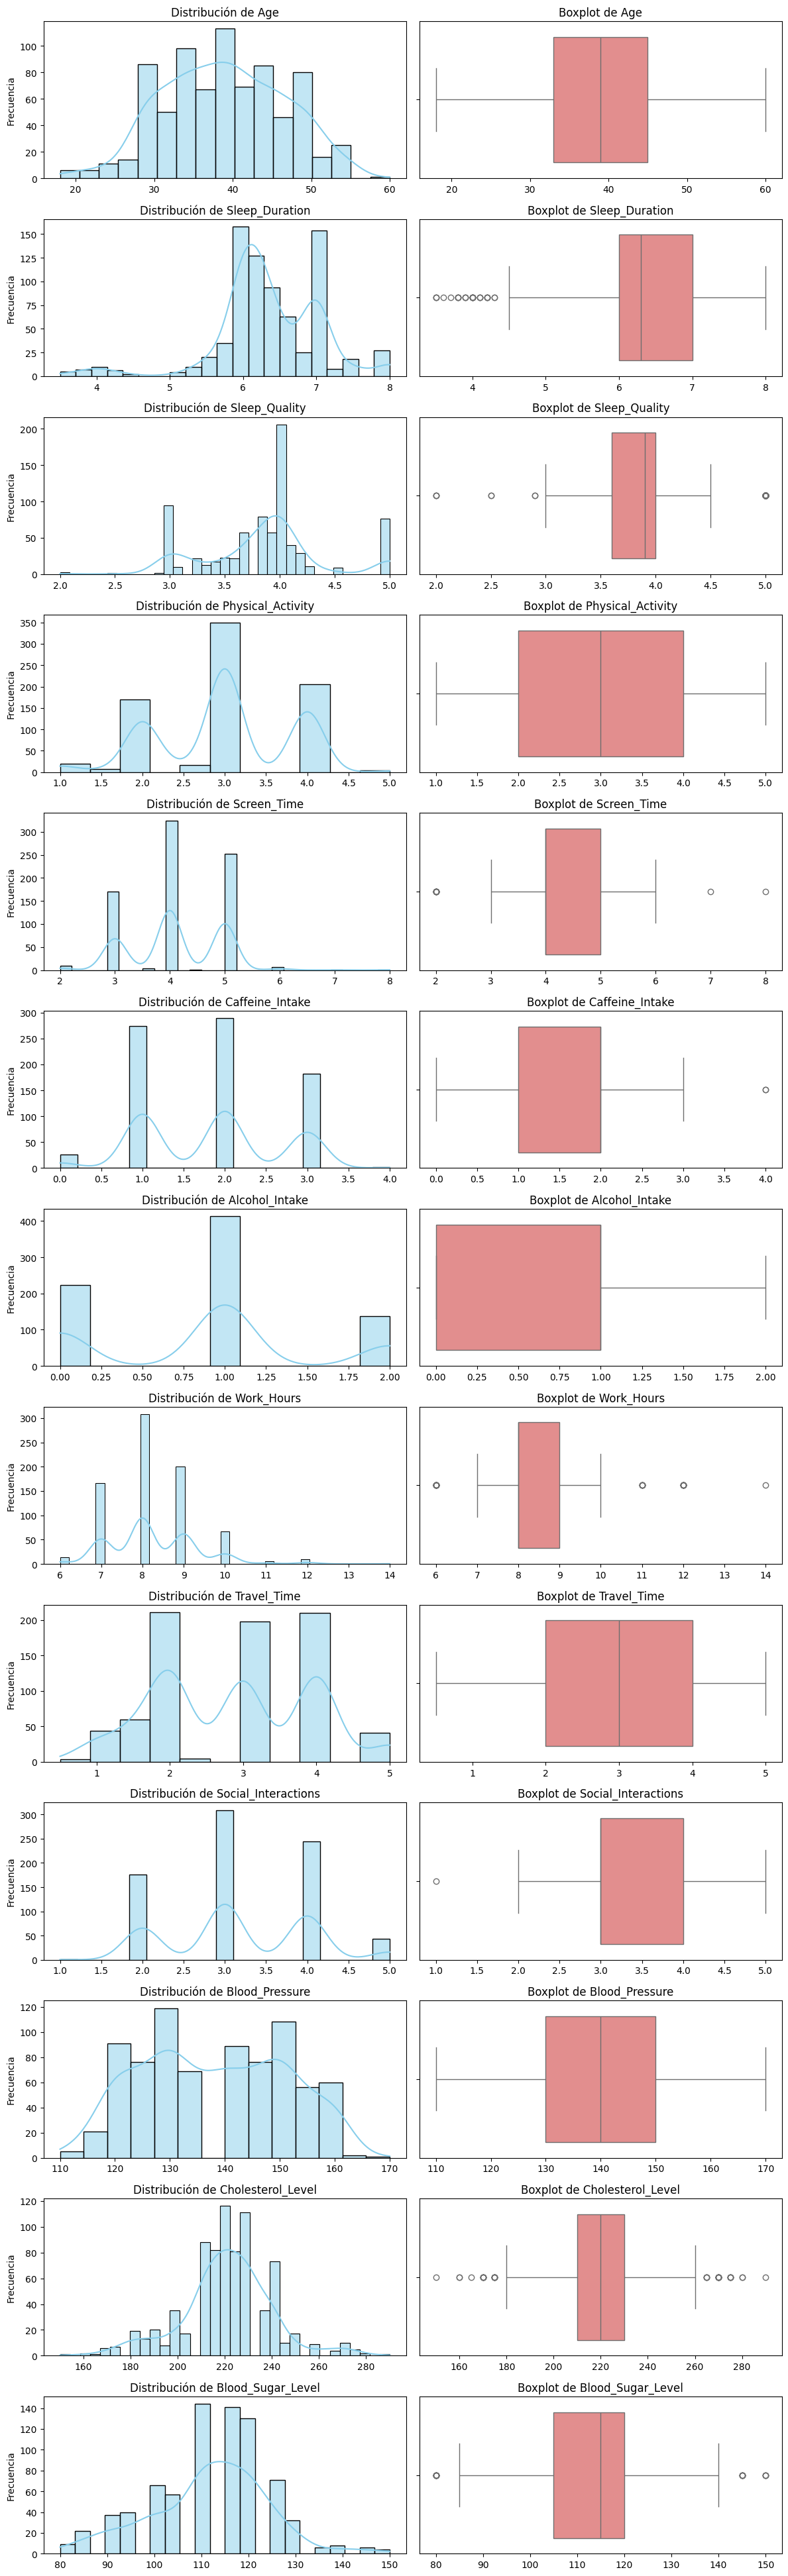

In [20]:
# Análisis de variables numéricas

# Crear una figura con subplots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 3), 
                         gridspec_kw={'height_ratios': [1] * len(numerical_columns)})

# Iterar por cada variable y generar gráficos
for i, var in enumerate(numerical_columns):
    # Histograma
    sns.histplot(ax=axes[i, 0], data=ds, x=var, kde=True, color='skyblue')
    axes[i, 0].set(title=f"Distribución de {var}", xlabel=None, ylabel="Frecuencia")
    
    # Boxplot
    sns.boxplot(ax=axes[i, 1], data=ds, x=var, color='lightcoral')
    axes[i, 1].set(title=f"Boxplot de {var}", xlabel=None, ylabel=None)

# Ajustar diseño
plt.tight_layout()
plt.show()